In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import missingno as msno
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



from sklearn.model_selection import cross_validate

from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', None)

%matplotlib inline  

housing_raw = pd.read_csv('Ames_HousePrice.csv', index_col=0)
price = housing_raw['SalePrice'].copy()
housing_raw.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [24]:
data = {
    'model':['Lasso','Lasso Tuned','MLR','Random Forest', 'Random Forest Tuned'],
    'f1':[0.9136383008526572, 0.91575326, 0.90740474, 0.89937707, 0.90603073],
    'f2':[0.9094807211858146, 0.91467071, 0.90030251, 0.88896888, 0.90814054],
    'f3':[0.9219368898607594, 0.92624357, 0.92025022, 0.91208996, 0.92284517],
    'f4':[0.9113320170837838, 0.91480828, 0.91236952, 0.90068164, 0.91104507],
    'f5':[0.8994931410296707, 0.90628512, 0.90372881, 0.89815625, 0.90473758]
}
model_stats = pd.DataFrame(data)
model_stats = model_stats.set_index('model').T
model_stats

model,Lasso,Lasso Tuned,MLR,Random Forest,Random Forest Tuned
f1,0.913638,0.915753,0.907405,0.899377,0.906031
f2,0.909481,0.914671,0.900303,0.888969,0.908141
f3,0.921937,0.926244,0.920250,0.912090,0.922845
f4,0.911332,0.914808,0.912370,0.900682,0.911045
f5,0.899493,0.906285,0.903729,0.898156,0.904738


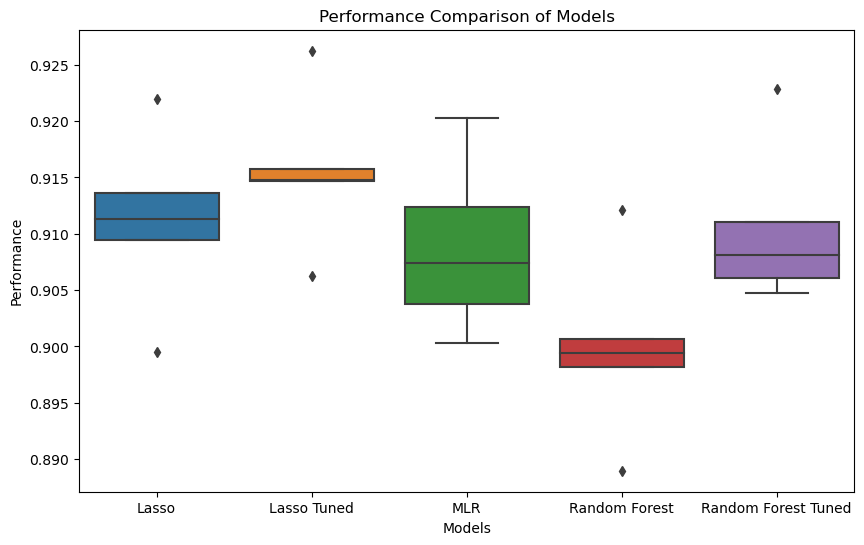

In [25]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=model_stats)
plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Performance Comparison of Models')
plt.show()

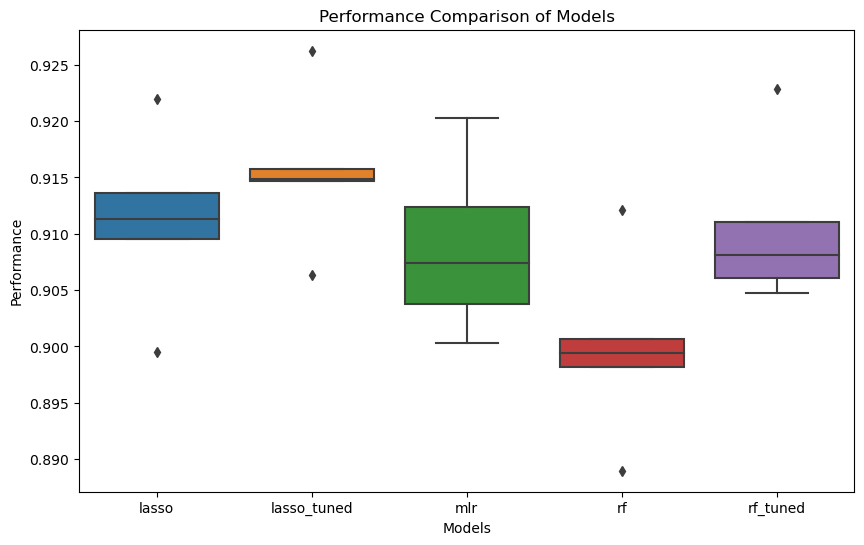

In [20]:
data = {
    'model':['lasso','lasso_tuned','mlr','rf', 'rf_tuned'],
    'f1':[0.9136383008526572, 0.91575326, 0.90740474, 0.89937707, 0.90603073],
    'f2':[0.9094807211858146, 0.91467071, 0.90030251, 0.88896888, 0.90814054],
    'f3':[0.9219368898607594, 0.92624357, 0.92025022, 0.91208996, 0.92284517],
    'f4':[0.9113320170837838, 0.91480828, 0.91236952, 0.90068164, 0.91104507],
    'f5':[0.8994931410296707, 0.90628512, 0.90372881, 0.89815625, 0.90473758]
}

model_stats = pd.DataFrame(data)

# Transpose the DataFrame to have models as rows and performance metrics as columns
model_stats = model_stats.set_index('model').T

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=model_stats)
plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Performance Comparison of Models')
plt.show()